# Comparative Gene Expression Analysis of Breast Tumor and Normal Samples (GSE25066 Dataset)

### Project Overview:

- ##### This project analyzes gene expression data to compare tumor and normal samples in a breast cancer.

### Main Objectives:

- ##### Compare tumor vs normal expression profiles.
- ##### Identify significantly different genes
- ##### Visualize gene-level differences using statistical plots

### Tools Used:
- ##### Python (Pandas, NumPy, SciPy, Seaborn, and Matplotlib)
- ##### Jupyter Notebook

### Project Steps:

##### 1. Data Collection, Overview & Transformation
##### 2. Statistical Analysis 
##### 3. Visualization
##### 4. Statistical Insights & Visual Insights
##### 5. Recommendations & Conclusions

### 1. Data Collection, Overview & Transformation

In [1]:
#importing libraris for this projects

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#loading the datasets

tumor = pd.read_csv(r"C:\Users\user\Documents\Emmanuel's Projects\Python_Projects\GSE25066-Tumor.txt", sep = "\t")

normal = pd.read_csv(r"C:\Users\user\Documents\Emmanuel's Projects\Python_Projects\GSE25066-Normal.txt", sep = "\t")

In [3]:
#checking the tumor dataset

tumor

,Hybridization REF,patient-1,patient-2,patient-3,patient-5,patient-6,patient-7,patient-8,patient-9,patient-10,...,patient-497,patient-498,patient-499,patient-500,patient-501,patient-503,patient-505,patient-506,patient-507,patient-508
0,2,12.215645,13.988573,14.291476,12.785805,11.794836,16.192511,12.869975,13.249973,11.802740,...,13.457213,9.648961,11.258780,12.775268,12.238787,11.475675,12.093756,12.505029,13.939546,12.959833
1,9,9.992839,12.905680,8.583623,9.499347,7.930721,7.752471,12.027260,8.694701,12.745403,...,11.451496,13.158680,9.004336,9.879124,10.216237,12.497522,9.259501,11.730591,8.804734,8.882331
2,10,5.752235,4.527156,5.361369,5.031058,5.606644,5.759093,6.851911,6.349312,5.987554,...,5.019484,6.695276,8.643460,6.792853,6.012154,6.197660,6.887878,5.611740,6.530070,6.381787
3,12,15.178096,13.730038,11.083116,11.970728,7.414998,12.939365,14.864565,15.066491,13.143580,...,14.113289,11.285134,13.515185,10.755272,12.629051,13.376652,14.170173,14.245030,10.501130,11.685014
4,13,4.947088,4.643822,4.766606,6.363855,5.116873,6.282514,5.988840,5.538022,5.552420,...,5.514218,5.822271,5.571440,7.016765,5.503115,5.737400,5.801156,5.480584,8.629061,6.323525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12629,100134401,10.582789,10.982646,8.578887,9.748160,10.114441,9.301341,12.159520,8.762336,10.016552,...,10.705709,8.854482,9.740597,9.462058,8.371239,9.607896,8.322790,9.002158,8.505800,7.761735
12630,100134498,5.830414,7.707200,6.522440,6.577468,4.847273,6.487930,5.065283,5.727436,7.463410,...,4.512147,6.007781,7.392139,4.479173,5.835381,4.699483,5.735311,5.047170,5.598101,7.314781
12631,100134713,6.331256,5.197306,7.306735,6.426105,7.097297,5.267995,6.933924,7.358556,3.543645,...,6.426096,4.670463,7.930509,7.131724,7.037954,7.190783,7.769846,5.358801,6.566849,7.170479
12632,100169750,10.023480,9.992234,8.422718,8.698994,8.696125,10.077569,10.122212,10.833807,9.684459,...,8.657587,10.455254,10.381717,8.265315,9.338412,8.757934,8.247466,7.843888,8.023677,9.712382


In [4]:
#checking the normal dataset

normal

,Hybridization REF,patient-4,patient-15,patient-23,patient-27,patient-28,patient-42,patient-44,patient-45,patient-48,...,patient-455,patient-459,patient-460,patient-462,patient-473,patient-478,patient-482,patient-483,patient-502,patient-504
0,2,12.027604,13.900854,11.152164,12.421732,11.982737,14.030689,11.547195,13.395827,13.439608,...,11.252449,10.911473,13.337793,13.910709,8.854670,9.842359,10.406411,9.697826,11.359760,13.248975
1,9,8.268311,8.227777,8.306369,14.775783,11.296656,8.517290,9.967458,8.513513,8.838466,...,13.265206,11.022267,9.667603,9.411016,11.894196,8.337668,13.339416,9.346791,11.359525,8.670158
2,10,5.393059,5.733713,5.551158,5.819995,5.156046,6.771025,5.619529,7.271736,4.743302,...,5.793354,8.826928,5.871209,6.847163,5.846197,6.337645,7.467352,6.328615,6.025891,6.513474
3,12,9.006283,12.137981,13.028404,14.086706,11.346116,12.023112,14.268290,15.446347,10.678241,...,13.266540,12.116647,11.781314,11.717825,14.226362,10.586987,15.621731,8.129153,13.755478,13.411808
4,13,4.511244,6.785314,4.255196,4.295831,5.332657,4.896162,7.856896,5.642245,7.653373,...,4.600496,7.202337,7.771792,5.749144,5.287751,5.151574,5.702702,5.273029,5.360985,8.444186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12629,100134401,8.641142,9.947478,10.267395,12.189148,9.898204,9.995535,9.918942,9.673959,10.409665,...,7.764366,7.433860,8.715626,8.552544,7.110954,9.399333,8.667130,9.152102,7.107173,7.933065
12630,100134498,5.405443,5.641556,6.557270,7.575809,6.852107,6.623949,7.955536,5.643881,7.198412,...,7.331435,5.226061,4.678381,8.029322,6.148873,4.371202,4.367801,5.265949,6.853843,5.676945
12631,100134713,5.681710,8.132632,5.438931,7.241322,6.867747,5.591727,6.805336,8.163241,5.517886,...,6.747263,6.593904,5.269615,3.729906,4.247833,6.749127,6.865841,7.366862,6.702152,5.792057
12632,100169750,6.687093,11.380567,8.908105,9.544937,9.463123,8.414222,10.030216,10.489912,9.628288,...,9.017531,8.238571,7.796225,9.359078,8.858683,8.383536,9.506480,9.351933,6.435463,10.090452


In [5]:
#inspecting tumor dataset structure and types

tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12634 entries, 0 to 12633
Columns: 393 entries, Hybridization REF to patient-508
dtypes: float64(392), int64(1)
memory usage: 37.9 MB


In [6]:
#inspecting normal dataset structure and types

normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12634 entries, 0 to 12633
Columns: 101 entries, Hybridization REF to patient-504
dtypes: float64(100), int64(1)
memory usage: 9.7 MB


In [7]:
#The "Hybridization REF" column was renamed to "geneID" for easier referencing and clarity during analysis.

tumor.rename(
    columns=
    {'Hybridization REF':'geneID'
    }, inplace = True
)
tumor

,geneID,patient-1,patient-2,patient-3,patient-5,patient-6,patient-7,patient-8,patient-9,patient-10,...,patient-497,patient-498,patient-499,patient-500,patient-501,patient-503,patient-505,patient-506,patient-507,patient-508
0,2,12.215645,13.988573,14.291476,12.785805,11.794836,16.192511,12.869975,13.249973,11.802740,...,13.457213,9.648961,11.258780,12.775268,12.238787,11.475675,12.093756,12.505029,13.939546,12.959833
1,9,9.992839,12.905680,8.583623,9.499347,7.930721,7.752471,12.027260,8.694701,12.745403,...,11.451496,13.158680,9.004336,9.879124,10.216237,12.497522,9.259501,11.730591,8.804734,8.882331
2,10,5.752235,4.527156,5.361369,5.031058,5.606644,5.759093,6.851911,6.349312,5.987554,...,5.019484,6.695276,8.643460,6.792853,6.012154,6.197660,6.887878,5.611740,6.530070,6.381787
3,12,15.178096,13.730038,11.083116,11.970728,7.414998,12.939365,14.864565,15.066491,13.143580,...,14.113289,11.285134,13.515185,10.755272,12.629051,13.376652,14.170173,14.245030,10.501130,11.685014
4,13,4.947088,4.643822,4.766606,6.363855,5.116873,6.282514,5.988840,5.538022,5.552420,...,5.514218,5.822271,5.571440,7.016765,5.503115,5.737400,5.801156,5.480584,8.629061,6.323525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12629,100134401,10.582789,10.982646,8.578887,9.748160,10.114441,9.301341,12.159520,8.762336,10.016552,...,10.705709,8.854482,9.740597,9.462058,8.371239,9.607896,8.322790,9.002158,8.505800,7.761735
12630,100134498,5.830414,7.707200,6.522440,6.577468,4.847273,6.487930,5.065283,5.727436,7.463410,...,4.512147,6.007781,7.392139,4.479173,5.835381,4.699483,5.735311,5.047170,5.598101,7.314781
12631,100134713,6.331256,5.197306,7.306735,6.426105,7.097297,5.267995,6.933924,7.358556,3.543645,...,6.426096,4.670463,7.930509,7.131724,7.037954,7.190783,7.769846,5.358801,6.566849,7.170479
12632,100169750,10.023480,9.992234,8.422718,8.698994,8.696125,10.077569,10.122212,10.833807,9.684459,...,8.657587,10.455254,10.381717,8.265315,9.338412,8.757934,8.247466,7.843888,8.023677,9.712382


In [8]:
#The "Hybridization REF" column was renamed to "geneID" for easier referencing and clarity during analysis.

normal.rename(
    columns=
    {'Hybridization REF':'geneID'
    }, inplace = True
)
normal

,geneID,patient-4,patient-15,patient-23,patient-27,patient-28,patient-42,patient-44,patient-45,patient-48,...,patient-455,patient-459,patient-460,patient-462,patient-473,patient-478,patient-482,patient-483,patient-502,patient-504
0,2,12.027604,13.900854,11.152164,12.421732,11.982737,14.030689,11.547195,13.395827,13.439608,...,11.252449,10.911473,13.337793,13.910709,8.854670,9.842359,10.406411,9.697826,11.359760,13.248975
1,9,8.268311,8.227777,8.306369,14.775783,11.296656,8.517290,9.967458,8.513513,8.838466,...,13.265206,11.022267,9.667603,9.411016,11.894196,8.337668,13.339416,9.346791,11.359525,8.670158
2,10,5.393059,5.733713,5.551158,5.819995,5.156046,6.771025,5.619529,7.271736,4.743302,...,5.793354,8.826928,5.871209,6.847163,5.846197,6.337645,7.467352,6.328615,6.025891,6.513474
3,12,9.006283,12.137981,13.028404,14.086706,11.346116,12.023112,14.268290,15.446347,10.678241,...,13.266540,12.116647,11.781314,11.717825,14.226362,10.586987,15.621731,8.129153,13.755478,13.411808
4,13,4.511244,6.785314,4.255196,4.295831,5.332657,4.896162,7.856896,5.642245,7.653373,...,4.600496,7.202337,7.771792,5.749144,5.287751,5.151574,5.702702,5.273029,5.360985,8.444186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12629,100134401,8.641142,9.947478,10.267395,12.189148,9.898204,9.995535,9.918942,9.673959,10.409665,...,7.764366,7.433860,8.715626,8.552544,7.110954,9.399333,8.667130,9.152102,7.107173,7.933065
12630,100134498,5.405443,5.641556,6.557270,7.575809,6.852107,6.623949,7.955536,5.643881,7.198412,...,7.331435,5.226061,4.678381,8.029322,6.148873,4.371202,4.367801,5.265949,6.853843,5.676945
12631,100134713,5.681710,8.132632,5.438931,7.241322,6.867747,5.591727,6.805336,8.163241,5.517886,...,6.747263,6.593904,5.269615,3.729906,4.247833,6.749127,6.865841,7.366862,6.702152,5.792057
12632,100169750,6.687093,11.380567,8.908105,9.544937,9.463123,8.414222,10.030216,10.489912,9.628288,...,9.017531,8.238571,7.796225,9.359078,8.858683,8.383536,9.506480,9.351933,6.435463,10.090452


In [9]:
#Setting "geneID" as the index for easier referencing

tumor = tumor.set_index('geneID')
tumor

,patient-1,patient-2,patient-3,patient-5,patient-6,patient-7,patient-8,patient-9,patient-10,patient-11,...,patient-497,patient-498,patient-499,patient-500,patient-501,patient-503,patient-505,patient-506,patient-507,patient-508
geneID,,,,,,,,,,,,,,,,,,,,,
2,12.215645,13.988573,14.291476,12.785805,11.794836,16.192511,12.869975,13.249973,11.802740,11.958015,...,13.457213,9.648961,11.258780,12.775268,12.238787,11.475675,12.093756,12.505029,13.939546,12.959833
9,9.992839,12.905680,8.583623,9.499347,7.930721,7.752471,12.027260,8.694701,12.745403,9.133142,...,11.451496,13.158680,9.004336,9.879124,10.216237,12.497522,9.259501,11.730591,8.804734,8.882331
10,5.752235,4.527156,5.361369,5.031058,5.606644,5.759093,6.851911,6.349312,5.987554,7.067248,...,5.019484,6.695276,8.643460,6.792853,6.012154,6.197660,6.887878,5.611740,6.530070,6.381787
12,15.178096,13.730038,11.083116,11.970728,7.414998,12.939365,14.864565,15.066491,13.143580,9.998833,...,14.113289,11.285134,13.515185,10.755272,12.629051,13.376652,14.170173,14.245030,10.501130,11.685014
13,4.947088,4.643822,4.766606,6.363855,5.116873,6.282514,5.988840,5.538022,5.552420,6.986157,...,5.514218,5.822271,5.571440,7.016765,5.503115,5.737400,5.801156,5.480584,8.629061,6.323525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100134401,10.582789,10.982646,8.578887,9.748160,10.114441,9.301341,12.159520,8.762336,10.016552,9.853841,...,10.705709,8.854482,9.740597,9.462058,8.371239,9.607896,8.322790,9.002158,8.505800,7.761735
100134498,5.830414,7.707200,6.522440,6.577468,4.847273,6.487930,5.065283,5.727436,7.463410,7.813862,...,4.512147,6.007781,7.392139,4.479173,5.835381,4.699483,5.735311,5.047170,5.598101,7.314781
100134713,6.331256,5.197306,7.306735,6.426105,7.097297,5.267995,6.933924,7.358556,3.543645,5.944421,...,6.426096,4.670463,7.930509,7.131724,7.037954,7.190783,7.769846,5.358801,6.566849,7.170479


In [10]:
#Setting "geneID" as the index for easier referencing

normal = normal.set_index('geneID')
normal

,patient-4,patient-15,patient-23,patient-27,patient-28,patient-42,patient-44,patient-45,patient-48,patient-51,...,patient-455,patient-459,patient-460,patient-462,patient-473,patient-478,patient-482,patient-483,patient-502,patient-504
geneID,,,,,,,,,,,,,,,,,,,,,
2,12.027604,13.900854,11.152164,12.421732,11.982737,14.030689,11.547195,13.395827,13.439608,14.030206,...,11.252449,10.911473,13.337793,13.910709,8.854670,9.842359,10.406411,9.697826,11.359760,13.248975
9,8.268311,8.227777,8.306369,14.775783,11.296656,8.517290,9.967458,8.513513,8.838466,10.066620,...,13.265206,11.022267,9.667603,9.411016,11.894196,8.337668,13.339416,9.346791,11.359525,8.670158
10,5.393059,5.733713,5.551158,5.819995,5.156046,6.771025,5.619529,7.271736,4.743302,5.278936,...,5.793354,8.826928,5.871209,6.847163,5.846197,6.337645,7.467352,6.328615,6.025891,6.513474
12,9.006283,12.137981,13.028404,14.086706,11.346116,12.023112,14.268290,15.446347,10.678241,14.516039,...,13.266540,12.116647,11.781314,11.717825,14.226362,10.586987,15.621731,8.129153,13.755478,13.411808
13,4.511244,6.785314,4.255196,4.295831,5.332657,4.896162,7.856896,5.642245,7.653373,4.659636,...,4.600496,7.202337,7.771792,5.749144,5.287751,5.151574,5.702702,5.273029,5.360985,8.444186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100134401,8.641142,9.947478,10.267395,12.189148,9.898204,9.995535,9.918942,9.673959,10.409665,8.197209,...,7.764366,7.433860,8.715626,8.552544,7.110954,9.399333,8.667130,9.152102,7.107173,7.933065
100134498,5.405443,5.641556,6.557270,7.575809,6.852107,6.623949,7.955536,5.643881,7.198412,4.876484,...,7.331435,5.226061,4.678381,8.029322,6.148873,4.371202,4.367801,5.265949,6.853843,5.676945
100134713,5.681710,8.132632,5.438931,7.241322,6.867747,5.591727,6.805336,8.163241,5.517886,7.619779,...,6.747263,6.593904,5.269615,3.729906,4.247833,6.749127,6.865841,7.366862,6.702152,5.792057


In [11]:
#Added "tumor_" prefix to column names to easily differentiate tumor and normal samples during analysis.

tumor = tumor.rename(
    columns = lambda patient: 'tumor_' + str(patient)
)
tumor

,tumor_patient-1,tumor_patient-2,tumor_patient-3,tumor_patient-5,tumor_patient-6,tumor_patient-7,tumor_patient-8,tumor_patient-9,tumor_patient-10,tumor_patient-11,...,tumor_patient-497,tumor_patient-498,tumor_patient-499,tumor_patient-500,tumor_patient-501,tumor_patient-503,tumor_patient-505,tumor_patient-506,tumor_patient-507,tumor_patient-508
geneID,,,,,,,,,,,,,,,,,,,,,
2,12.215645,13.988573,14.291476,12.785805,11.794836,16.192511,12.869975,13.249973,11.802740,11.958015,...,13.457213,9.648961,11.258780,12.775268,12.238787,11.475675,12.093756,12.505029,13.939546,12.959833
9,9.992839,12.905680,8.583623,9.499347,7.930721,7.752471,12.027260,8.694701,12.745403,9.133142,...,11.451496,13.158680,9.004336,9.879124,10.216237,12.497522,9.259501,11.730591,8.804734,8.882331
10,5.752235,4.527156,5.361369,5.031058,5.606644,5.759093,6.851911,6.349312,5.987554,7.067248,...,5.019484,6.695276,8.643460,6.792853,6.012154,6.197660,6.887878,5.611740,6.530070,6.381787
12,15.178096,13.730038,11.083116,11.970728,7.414998,12.939365,14.864565,15.066491,13.143580,9.998833,...,14.113289,11.285134,13.515185,10.755272,12.629051,13.376652,14.170173,14.245030,10.501130,11.685014
13,4.947088,4.643822,4.766606,6.363855,5.116873,6.282514,5.988840,5.538022,5.552420,6.986157,...,5.514218,5.822271,5.571440,7.016765,5.503115,5.737400,5.801156,5.480584,8.629061,6.323525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100134401,10.582789,10.982646,8.578887,9.748160,10.114441,9.301341,12.159520,8.762336,10.016552,9.853841,...,10.705709,8.854482,9.740597,9.462058,8.371239,9.607896,8.322790,9.002158,8.505800,7.761735
100134498,5.830414,7.707200,6.522440,6.577468,4.847273,6.487930,5.065283,5.727436,7.463410,7.813862,...,4.512147,6.007781,7.392139,4.479173,5.835381,4.699483,5.735311,5.047170,5.598101,7.314781
100134713,6.331256,5.197306,7.306735,6.426105,7.097297,5.267995,6.933924,7.358556,3.543645,5.944421,...,6.426096,4.670463,7.930509,7.131724,7.037954,7.190783,7.769846,5.358801,6.566849,7.170479


In [12]:
#Added "normal_" prefix to column names to easily differentiate tumor and normal samples during analysis.

normal = normal.rename(
    columns = lambda patient: 'normal_' + str(patient)
)
normal

,normal_patient-4,normal_patient-15,normal_patient-23,normal_patient-27,normal_patient-28,normal_patient-42,normal_patient-44,normal_patient-45,normal_patient-48,normal_patient-51,...,normal_patient-455,normal_patient-459,normal_patient-460,normal_patient-462,normal_patient-473,normal_patient-478,normal_patient-482,normal_patient-483,normal_patient-502,normal_patient-504
geneID,,,,,,,,,,,,,,,,,,,,,
2,12.027604,13.900854,11.152164,12.421732,11.982737,14.030689,11.547195,13.395827,13.439608,14.030206,...,11.252449,10.911473,13.337793,13.910709,8.854670,9.842359,10.406411,9.697826,11.359760,13.248975
9,8.268311,8.227777,8.306369,14.775783,11.296656,8.517290,9.967458,8.513513,8.838466,10.066620,...,13.265206,11.022267,9.667603,9.411016,11.894196,8.337668,13.339416,9.346791,11.359525,8.670158
10,5.393059,5.733713,5.551158,5.819995,5.156046,6.771025,5.619529,7.271736,4.743302,5.278936,...,5.793354,8.826928,5.871209,6.847163,5.846197,6.337645,7.467352,6.328615,6.025891,6.513474
12,9.006283,12.137981,13.028404,14.086706,11.346116,12.023112,14.268290,15.446347,10.678241,14.516039,...,13.266540,12.116647,11.781314,11.717825,14.226362,10.586987,15.621731,8.129153,13.755478,13.411808
13,4.511244,6.785314,4.255196,4.295831,5.332657,4.896162,7.856896,5.642245,7.653373,4.659636,...,4.600496,7.202337,7.771792,5.749144,5.287751,5.151574,5.702702,5.273029,5.360985,8.444186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100134401,8.641142,9.947478,10.267395,12.189148,9.898204,9.995535,9.918942,9.673959,10.409665,8.197209,...,7.764366,7.433860,8.715626,8.552544,7.110954,9.399333,8.667130,9.152102,7.107173,7.933065
100134498,5.405443,5.641556,6.557270,7.575809,6.852107,6.623949,7.955536,5.643881,7.198412,4.876484,...,7.331435,5.226061,4.678381,8.029322,6.148873,4.371202,4.367801,5.265949,6.853843,5.676945
100134713,5.681710,8.132632,5.438931,7.241322,6.867747,5.591727,6.805336,8.163241,5.517886,7.619779,...,6.747263,6.593904,5.269615,3.729906,4.247833,6.749127,6.865841,7.366862,6.702152,5.792057


In [13]:
#Merged the two datasets for analysis

df = pd.concat([tumor, normal], axis = 1)
df

,tumor_patient-1,tumor_patient-2,tumor_patient-3,tumor_patient-5,tumor_patient-6,tumor_patient-7,tumor_patient-8,tumor_patient-9,tumor_patient-10,tumor_patient-11,...,normal_patient-455,normal_patient-459,normal_patient-460,normal_patient-462,normal_patient-473,normal_patient-478,normal_patient-482,normal_patient-483,normal_patient-502,normal_patient-504
geneID,,,,,,,,,,,,,,,,,,,,,
2,12.215645,13.988573,14.291476,12.785805,11.794836,16.192511,12.869975,13.249973,11.802740,11.958015,...,11.252449,10.911473,13.337793,13.910709,8.854670,9.842359,10.406411,9.697826,11.359760,13.248975
9,9.992839,12.905680,8.583623,9.499347,7.930721,7.752471,12.027260,8.694701,12.745403,9.133142,...,13.265206,11.022267,9.667603,9.411016,11.894196,8.337668,13.339416,9.346791,11.359525,8.670158
10,5.752235,4.527156,5.361369,5.031058,5.606644,5.759093,6.851911,6.349312,5.987554,7.067248,...,5.793354,8.826928,5.871209,6.847163,5.846197,6.337645,7.467352,6.328615,6.025891,6.513474
12,15.178096,13.730038,11.083116,11.970728,7.414998,12.939365,14.864565,15.066491,13.143580,9.998833,...,13.266540,12.116647,11.781314,11.717825,14.226362,10.586987,15.621731,8.129153,13.755478,13.411808
13,4.947088,4.643822,4.766606,6.363855,5.116873,6.282514,5.988840,5.538022,5.552420,6.986157,...,4.600496,7.202337,7.771792,5.749144,5.287751,5.151574,5.702702,5.273029,5.360985,8.444186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100134401,10.582789,10.982646,8.578887,9.748160,10.114441,9.301341,12.159520,8.762336,10.016552,9.853841,...,7.764366,7.433860,8.715626,8.552544,7.110954,9.399333,8.667130,9.152102,7.107173,7.933065
100134498,5.830414,7.707200,6.522440,6.577468,4.847273,6.487930,5.065283,5.727436,7.463410,7.813862,...,7.331435,5.226061,4.678381,8.029322,6.148873,4.371202,4.367801,5.265949,6.853843,5.676945
100134713,6.331256,5.197306,7.306735,6.426105,7.097297,5.267995,6.933924,7.358556,3.543645,5.944421,...,6.747263,6.593904,5.269615,3.729906,4.247833,6.749127,6.865841,7.366862,6.702152,5.792057


In [14]:
#inspecting the merged datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12634 entries, 2 to 100170939
Columns: 492 entries, tumor_patient-1 to normal_patient-504
dtypes: float64(492)
memory usage: 47.5 MB


In [15]:
#checking the first few rows

df.head()

,tumor_patient-1,tumor_patient-2,tumor_patient-3,tumor_patient-5,tumor_patient-6,tumor_patient-7,tumor_patient-8,tumor_patient-9,tumor_patient-10,tumor_patient-11,...,normal_patient-455,normal_patient-459,normal_patient-460,normal_patient-462,normal_patient-473,normal_patient-478,normal_patient-482,normal_patient-483,normal_patient-502,normal_patient-504
geneID,,,,,,,,,,,,,,,,,,,,,
2,12.215645,13.988573,14.291476,12.785805,11.794836,16.192511,12.869975,13.249973,11.802740,11.958015,...,11.252449,10.911473,13.337793,13.910709,8.854670,9.842359,10.406411,9.697826,11.359760,13.248975
9,9.992839,12.905680,8.583623,9.499347,7.930721,7.752471,12.027260,8.694701,12.745403,9.133142,...,13.265206,11.022267,9.667603,9.411016,11.894196,8.337668,13.339416,9.346791,11.359525,8.670158
10,5.752235,4.527156,5.361369,5.031058,5.606644,5.759093,6.851911,6.349312,5.987554,7.067248,...,5.793354,8.826928,5.871209,6.847163,5.846197,6.337645,7.467352,6.328615,6.025891,6.513474
12,15.178096,13.730038,11.083116,11.970728,7.414998,12.939365,14.864565,15.066491,13.143580,9.998833,...,13.266540,12.116647,11.781314,11.717825,14.226362,10.586987,15.621731,8.129153,13.755478,13.411808
13,4.947088,4.643822,4.766606,6.363855,5.116873,6.282514,5.988840,5.538022,5.552420,6.986157,...,4.600496,7.202337,7.771792,5.749144,5.287751,5.151574,5.702702,5.273029,5.360985,8.444186


In [16]:
#checking the last few rows

df.tail()

,tumor_patient-1,tumor_patient-2,tumor_patient-3,tumor_patient-5,tumor_patient-6,tumor_patient-7,tumor_patient-8,tumor_patient-9,tumor_patient-10,tumor_patient-11,...,normal_patient-455,normal_patient-459,normal_patient-460,normal_patient-462,normal_patient-473,normal_patient-478,normal_patient-482,normal_patient-483,normal_patient-502,normal_patient-504
geneID,,,,,,,,,,,,,,,,,,,,,
100134401,10.582789,10.982646,8.578887,9.748160,10.114441,9.301341,12.159520,8.762336,10.016552,9.853841,...,7.764366,7.433860,8.715626,8.552544,7.110954,9.399333,8.667130,9.152102,7.107173,7.933065
100134498,5.830414,7.707200,6.522440,6.577468,4.847273,6.487930,5.065283,5.727436,7.463410,7.813862,...,7.331435,5.226061,4.678381,8.029322,6.148873,4.371202,4.367801,5.265949,6.853843,5.676945
100134713,6.331256,5.197306,7.306735,6.426105,7.097297,5.267995,6.933924,7.358556,3.543645,5.944421,...,6.747263,6.593904,5.269615,3.729906,4.247833,6.749127,6.865841,7.366862,6.702152,5.792057
100169750,10.023480,9.992234,8.422718,8.698994,8.696125,10.077569,10.122212,10.833807,9.684459,9.381909,...,9.017531,8.238571,7.796225,9.359078,8.858683,8.383536,9.506480,9.351933,6.435463,10.090452
100170939,9.588870,8.530115,7.649775,8.427879,8.024276,7.127464,11.916959,8.005456,9.609486,7.855516,...,7.646750,7.023232,7.465897,8.365837,7.975445,7.965405,7.538189,8.058094,8.613238,7.798637


In [17]:
#basic descriptive statistics

df.describe()

,tumor_patient-1,tumor_patient-2,tumor_patient-3,tumor_patient-5,tumor_patient-6,tumor_patient-7,tumor_patient-8,tumor_patient-9,tumor_patient-10,tumor_patient-11,...,normal_patient-455,normal_patient-459,normal_patient-460,normal_patient-462,normal_patient-473,normal_patient-478,normal_patient-482,normal_patient-483,normal_patient-502,normal_patient-504
count,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,...,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000,12634.000000
mean,8.063066,8.022040,8.058089,8.038684,7.977712,8.053724,8.021915,8.049791,8.008270,8.067905,...,8.079819,8.070787,8.125800,8.143276,8.014184,8.031279,8.024539,8.004334,8.069954,8.030545
std,2.172086,2.081332,2.089738,2.076712,2.137399,2.200073,2.053664,2.145855,2.075901,2.100638,...,2.058137,2.038656,2.027865,2.107723,2.044368,2.150956,2.039453,2.099886,2.052098,2.085441
min,0.371459,0.363719,0.429719,0.310069,-0.011363,-0.465057,0.980420,-1.435600,0.428173,0.295758,...,-0.630136,1.100689,0.714210,0.274023,0.189797,-0.171011,0.935496,0.941128,0.233410,-1.164311
25%,6.709614,6.741497,6.767234,6.749516,6.651075,6.691195,6.730270,6.686775,6.672351,6.753181,...,6.758953,6.775384,6.845269,6.872661,6.675111,6.669768,6.748276,6.671629,6.757548,6.720042
50%,8.215860,8.186836,8.161913,8.128326,8.059801,8.271926,8.139406,8.234541,8.105864,8.210754,...,8.162751,8.147848,8.190331,8.304098,8.093760,8.191438,8.104554,8.096510,8.137897,8.160402
75%,9.446532,9.358847,9.396143,9.348024,9.351017,9.491772,9.327536,9.437018,9.327673,9.407135,...,9.387544,9.373182,9.391048,9.436479,9.342568,9.424321,9.301416,9.348174,9.389017,9.348733
max,17.127661,17.182244,15.712050,16.773038,16.446824,16.330965,16.160157,17.604418,17.086825,16.194327,...,15.647195,15.520215,16.113209,17.045918,15.770900,16.816478,16.432511,15.473740,15.114045,16.614736


In [18]:
#checking for duplicates

df.duplicated().sum()

0

In [19]:
#checking for null values

df.isnull().sum()

tumor_patient-1       0
tumor_patient-2       0
tumor_patient-3       0
tumor_patient-5       0
tumor_patient-6       0
                     ..
normal_patient-478    0
normal_patient-482    0
normal_patient-483    0
normal_patient-502    0
normal_patient-504    0
Length: 492, dtype: int64

In [20]:
#checking the first & last 10 columns of the merged datasets

print(df.columns[:10])
print(df.columns[-10:])

Index(['tumor_patient-1', 'tumor_patient-2', 'tumor_patient-3',
       'tumor_patient-5', 'tumor_patient-6', 'tumor_patient-7',
       'tumor_patient-8', 'tumor_patient-9', 'tumor_patient-10',
       'tumor_patient-11'],
      dtype='object')
Index(['normal_patient-455', 'normal_patient-459', 'normal_patient-460',
       'normal_patient-462', 'normal_patient-473', 'normal_patient-478',
       'normal_patient-482', 'normal_patient-483', 'normal_patient-502',
       'normal_patient-504'],
      dtype='object')


In [21]:
#Extracted all columns containing "tumor_" from the dataset and stored them in a list for further analysis.

tumor_cols = []
for col in df.columns:
    if 'tumor_' in col:
        tumor_cols.append(col)
        print(col)

tumor_patient-1
tumor_patient-2
tumor_patient-3
tumor_patient-5
tumor_patient-6
tumor_patient-7
tumor_patient-8
tumor_patient-9
tumor_patient-10
tumor_patient-11
tumor_patient-12
tumor_patient-13
tumor_patient-14
tumor_patient-16
tumor_patient-17
tumor_patient-18
tumor_patient-19
tumor_patient-20
tumor_patient-21
tumor_patient-22
tumor_patient-24
tumor_patient-25
tumor_patient-26
tumor_patient-29
tumor_patient-30
tumor_patient-31
tumor_patient-32
tumor_patient-33
tumor_patient-34
tumor_patient-35
tumor_patient-36
tumor_patient-37
tumor_patient-38
tumor_patient-39
tumor_patient-40
tumor_patient-41
tumor_patient-43
tumor_patient-46
tumor_patient-47
tumor_patient-49
tumor_patient-50
tumor_patient-52
tumor_patient-53
tumor_patient-54
tumor_patient-55
tumor_patient-56
tumor_patient-57
tumor_patient-58
tumor_patient-60
tumor_patient-61
tumor_patient-62
tumor_patient-63
tumor_patient-64
tumor_patient-65
tumor_patient-66
tumor_patient-67
tumor_patient-68
tumor_patient-70
tumor_patient-71
tumor

In [22]:
#Extracted all columns containing "normal_" from the dataset and stored them in a list for further analysis.

normal_cols = []
for col in df.columns:
    if 'normal_' in col:
        normal_cols.append(col)
        print(col)

normal_patient-4
normal_patient-15
normal_patient-23
normal_patient-27
normal_patient-28
normal_patient-42
normal_patient-44
normal_patient-45
normal_patient-48
normal_patient-51
normal_patient-59
normal_patient-69
normal_patient-72
normal_patient-76
normal_patient-80
normal_patient-86
normal_patient-91
normal_patient-96
normal_patient-98
normal_patient-99
normal_patient-106
normal_patient-107
normal_patient-114
normal_patient-116
normal_patient-117
normal_patient-118
normal_patient-120
normal_patient-145
normal_patient-147
normal_patient-161
normal_patient-168
normal_patient-169
normal_patient-175
normal_patient-185
normal_patient-189
normal_patient-196
normal_patient-198
normal_patient-205
normal_patient-212
normal_patient-215
normal_patient-229
normal_patient-230
normal_patient-236
normal_patient-239
normal_patient-241
normal_patient-243
normal_patient-258
normal_patient-259
normal_patient-262
normal_patient-264
normal_patient-276
normal_patient-280
normal_patient-284
normal_patient

### 2. Statistical Analysis 

In [23]:
#Cal. the Pearson correlation (r) and p_value between average tumor and normal gene expressions.

tumor_mean = df[tumor_cols].mean(axis=1)
normal_mean = df[normal_cols].mean(axis=1)

r, p_value = stats.pearsonr(tumor_mean, normal_mean)
print(f'The correlation is: {r:.6f}, and P_value is: {p_value:.2e}')


The correlation is: 0.991714, and P_value is: 0.00e+00


In [24]:
#checking & displaying the p_value

if p_value < 1e-300:
    print(f'P_value is approximately 0(extremely small)')
else:
    print(f'P_value:{p_value:.2e}')

P_value is approximately 0(extremely small)


##### The tumor and normal samples show a very strong positive correlation (r = 0.99, p < 1e-300), indicating highly similar expression patterns across genes.

In [25]:
# Performing independent t-test to compare tumor and normal gene expression levels

t_stat, p_value = stats.ttest_ind(df[tumor_cols], df[normal_cols], axis = 1)
print(f' The t_stat is: {t_stat}, The p_value is: {p_value}', "\n")

 The t_stat is: [ 0.48039304  6.76603345  0.75518517 ... -0.76894103  0.73184115
  3.01315521], The p_value is: [6.31162334e-01 3.78703958e-11 4.50500717e-01 ... 4.42298782e-01
 4.64615396e-01 2.71928483e-03] 



In [26]:
# Adding t-statistic and p-value results as new columns in the dataframe

df['t_stat'] = t_stat
df['p_value'] = p_value
df

,tumor_patient-1,tumor_patient-2,tumor_patient-3,tumor_patient-5,tumor_patient-6,tumor_patient-7,tumor_patient-8,tumor_patient-9,tumor_patient-10,tumor_patient-11,...,normal_patient-460,normal_patient-462,normal_patient-473,normal_patient-478,normal_patient-482,normal_patient-483,normal_patient-502,normal_patient-504,t_stat,p_value
geneID,,,,,,,,,,,,,,,,,,,,,
2,12.215645,13.988573,14.291476,12.785805,11.794836,16.192511,12.869975,13.249973,11.802740,11.958015,...,13.337793,13.910709,8.854670,9.842359,10.406411,9.697826,11.359760,13.248975,0.480393,6.311623e-01
9,9.992839,12.905680,8.583623,9.499347,7.930721,7.752471,12.027260,8.694701,12.745403,9.133142,...,9.667603,9.411016,11.894196,8.337668,13.339416,9.346791,11.359525,8.670158,6.766033,3.787040e-11
10,5.752235,4.527156,5.361369,5.031058,5.606644,5.759093,6.851911,6.349312,5.987554,7.067248,...,5.871209,6.847163,5.846197,6.337645,7.467352,6.328615,6.025891,6.513474,0.755185,4.505007e-01
12,15.178096,13.730038,11.083116,11.970728,7.414998,12.939365,14.864565,15.066491,13.143580,9.998833,...,11.781314,11.717825,14.226362,10.586987,15.621731,8.129153,13.755478,13.411808,2.257995,2.438511e-02
13,4.947088,4.643822,4.766606,6.363855,5.116873,6.282514,5.988840,5.538022,5.552420,6.986157,...,7.771792,5.749144,5.287751,5.151574,5.702702,5.273029,5.360985,8.444186,-1.133497,2.575598e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100134401,10.582789,10.982646,8.578887,9.748160,10.114441,9.301341,12.159520,8.762336,10.016552,9.853841,...,8.715626,8.552544,7.110954,9.399333,8.667130,9.152102,7.107173,7.933065,3.349593,8.717165e-04
100134498,5.830414,7.707200,6.522440,6.577468,4.847273,6.487930,5.065283,5.727436,7.463410,7.813862,...,4.678381,8.029322,6.148873,4.371202,4.367801,5.265949,6.853843,5.676945,0.428952,6.681467e-01
100134713,6.331256,5.197306,7.306735,6.426105,7.097297,5.267995,6.933924,7.358556,3.543645,5.944421,...,5.269615,3.729906,4.247833,6.749127,6.865841,7.366862,6.702152,5.792057,-0.768941,4.422988e-01


In [27]:
# Selecting the top 10 genes with the smallest p-values (most statistically significant)

top_genes = df.sort_values('p_value').head(10)
top_genes[['t_stat', 'p_value']]

,t_stat,p_value
geneID,,
7913,-9.033742,3.828410e-18
4175,-8.453395,3.260943e-16
7398,-8.381098,5.589867e-16
4781,-8.359326,6.570619e-16
4171,-8.236912,1.621250e-15
9778,8.205244,2.044724e-15
79006,8.110952,4.064821e-15
2737,7.988655,9.824038e-15
3608,-7.976341,1.073102e-14


### 3. Visualization

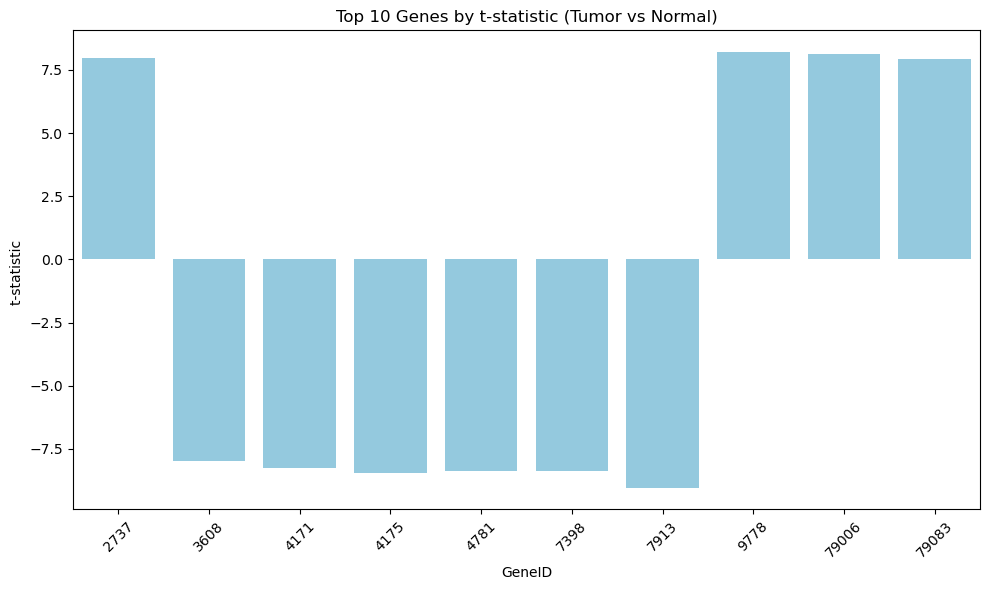

In [28]:
#A barplot showing the top 10 genes

top_genes = df.reindex(df['t_stat'].abs().sort_values(ascending = False).index).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(data = top_genes.reset_index(), x = 'geneID', y = 't_stat', color = 'skyblue')
plt.xticks(rotation = 45)
plt.xlabel('GeneID')
plt.ylabel('t-statistic ')
plt.title('Top 10 Genes by t-statistic (Tumor vs Normal)')
plt.tight_layout()
plt.show()

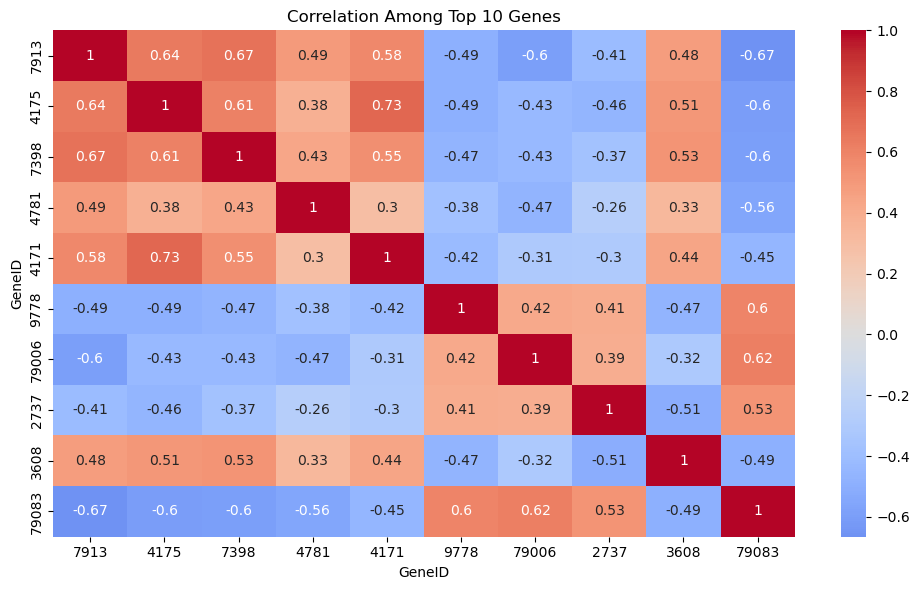

In [29]:
#Heatmap comparing top 10 genes

top_10 = df.reindex(df['t_stat'].abs().sort_values(ascending = False).index).head(10)
expr_data = df.loc[top_10.index, tumor_cols + normal_cols]

plt.figure(figsize = (10, 6))
sns.heatmap(expr_data.T.corr(), annot = True, cmap='coolwarm', center = 0)
plt.title('Correlation Among Top 10 Genes')
plt.xlabel('GeneID')
plt.ylabel('GeneID')
plt.tight_layout()
plt.show()

### 4. Statistical Insights & Visual Insight

**Statistical Insights:**

*Pearson Correlation*
- High correlation (≈0.99) between average tumor and normal expressions. Meaning overall gene expression patterns are similar across both conditions.

*t-test*
- Positive t-stat = Gene more expressed in tumor samples
- Negative t-stat = Gene more expressed in normal samples
- p-value < 0.05 = Statistically significant difference

##### Examples:

- Some genes (like those with p < 0.01) showed clear tumor-specific overexpression.

- Many others were not significant, suggesting consistent expression across both groups.

**Visual Insights:**

*Barplot*

- Shows top 10 genes with strongest tumor–normal differences.
- Taller bars = larger expression difference.


*Heatmap*
- Compared top 10 genes across tumor and normal samples.
- Brown = strong positive correlation (genes move together).
- Blue = negative correlation (genes move in opposite directions).
- Diagonal = perfect self-correlation (r = 1.0)

### 5. Recommendations & Conclusions
**Recommendations:**

- Focus on the top differentially expressed genes as they are the most likely to drive biological differences between tumor and normal samples. 
- Perform multiple testing correction (e.g., FDR) for accuracy
- Include biological annotations (e.g., gene names, pathways) to interpret significance biologically.


**Conclusions:**

- Tumor and normal samples have an overall similar expression trend, but several genes show significant differences.
- These differentially expressed genes could serve as potential biomarkers for tumor detection or progression studies.
- The t-test efficiently highlighted which genes stand out statistically.
- The barplot and heatmap visually confirm distinct expression patterns.
